# -*- coding: utf-8 -*-
"""YOLOv11

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1547B5oZc0ohCPsqLBVQRbEx6U2qhGRex

**라이브러리 로드**
"""

In [1]:
import torch
print("torch.cuda.is_available() =", torch.cuda.is_available())
print("torch.cuda.device_count() =", torch.cuda.device_count())
print("torch.version.cuda =", torch.version.cuda)

from google.colab import drive
drive.mount('/content/drive')

torch.cuda.is_available() = True
torch.cuda.device_count() = 1
torch.version.cuda = 12.6
Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd

'/content'

In [4]:
cd /content/drive/MyDrive/AI/vandalism/Object_Dectection

/content/drive/MyDrive/AI/vandalism/Object_Dectection


In [5]:
path = '/content/drive/MyDrive/AI/vandalism/Object_Dectection'

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
"""**라이브러리 설치**"""

!pip install ultralytics -q

import ultralytics
print(ultralytics.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.220


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
version = project.version(1)
dataset = version.download("")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 142.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Paju_YOLO-1 in yolov11:: 100%|██████████| 1912/1912 [00:15<00:00, 120.28it/s]


In [8]:
pwd

'/content/drive/MyDrive/AI/vandalism/Object_Dectection'

In [13]:
import torch
from ultralytics import YOLO

torch.cuda.empty_cache()

model = YOLO("yolo11n.pt")

model.train(
    data=path + "/Paju_YOLO-1/data.yaml",
    epochs=150,
    imgsz=800,
    batch=8,                  # 🔼 배치 키움
    optimizer='AdamW',        # 🔧 자동 → 수동 지정
    lr0=2e-4,                 # 🔧 학습률 반영됨
    momentum=0.937,           # 기본 YOLO 설정
    weight_decay=0.0005,      # 살짝 올림 (일반적 값)
    hsv_s=0.6,                # 살짝 완화 (0.8 → 0.6)
    hsv_v=0.4,
    fliplr=0.5,
    translate=0.1,
    mosaic=0.3,               # 🔽 과도한 증강 방지
    cos_lr=True,
    patience=30,              # early stop 기준 확대
    cls=1.0,                  # 🔧 불균형 보정 기본값 복구
    dropout=0.0,              # 🔧 제거
    device=0,
    deterministic=True,       # 재현성 확보
    name="yolo_model"
)

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=1.0, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/AI/vandalism/Object_Dectection/Paju_YOLO-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.6, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0002, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=0.3, multi_scale=False, name=yolo_model6, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e6c77f7e7e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [15]:
pwd

'/content/drive/MyDrive/AI/vandalism/Object_Dectection'

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   42.2053         1.65893         6.75207         2.25200   
1      2   67.1250         1.50243         5.23379         2.12502   
2      3   92.3243         1.43895         4.70410         2.06307   
3      4  116.7570         1.33363         4.21051         1.95764   
4      5  141.7730         1.35083         4.04848         1.96616   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00204            0.37636           0.04859   
1               0.58548            0.18198           0.17843   
2               0.82368            0.22562           0.31727   
3               0.85687            

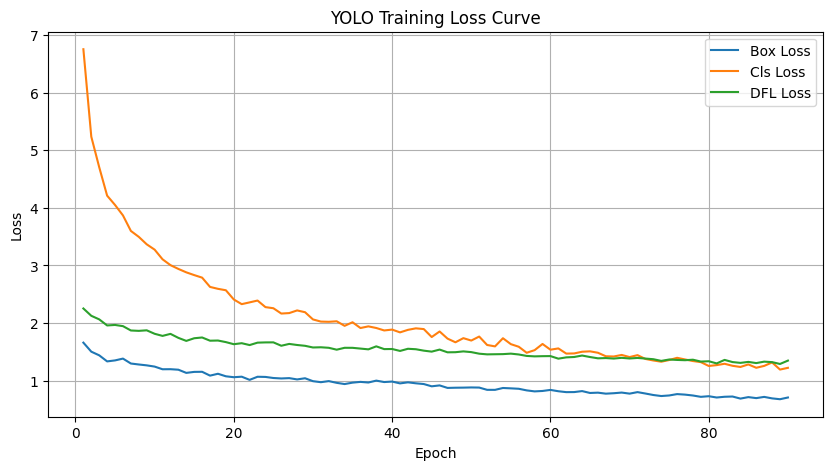

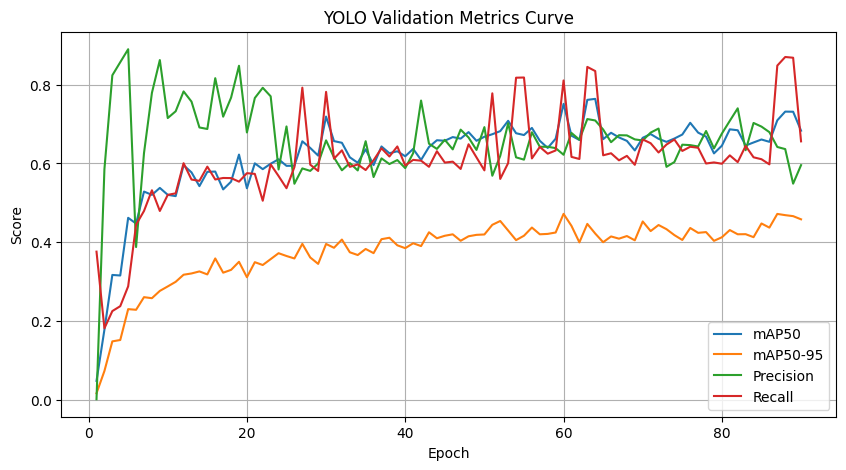

In [16]:
"""**모델 학습 곡선 그리기**"""

import pandas as pd
import matplotlib.pyplot as plt

# YOLO 학습 로그 파일 경로
log_path = "runs/detect/yolo_model6/results.csv"

# CSV 파일 읽기
df = pd.read_csv(log_path)

# 데이터 확인
print(df.columns)
print(df.head())

# 1️⃣ 손실 (Loss) 시각화
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Cls Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss')
plt.title('YOLO Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 2️⃣ 성능 지표 (mAP, Precision, Recall) 시각화
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.title('YOLO Validation Metrics Curve')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

In [18]:
pwd

'/content/drive/MyDrive/AI/vandalism/Object_Dectection'

WARNING ⚠️ 'line_thickness' is deprecated and will be removed in the future. Use 'line_width' instead.

image 1/1 /content/drive/MyDrive/AI/vandalism/Object_Dectection/street_light_test.jpeg: 800x480 1 streetlight, 8.5ms
Speed: 3.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 480)
Results saved to /content/drive/MyDrive/AI/vandalism/Object_Dectection/runs/detect/predict32
Detected: streetlight (0.85)
Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)

PyTorch: starting from 'runs/detect/yolo_model6/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 9, 13125) (5.3 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 2.0s, saved as 'runs/detect/yolo_model6/weights/best.onnx' (10.2 MB)

Export complete (2.6s)
Results saved to /content/drive/MyDrive/AI/vandalism/Object_Dectection/runs/detect/yolo_model6/weights
Predict:         

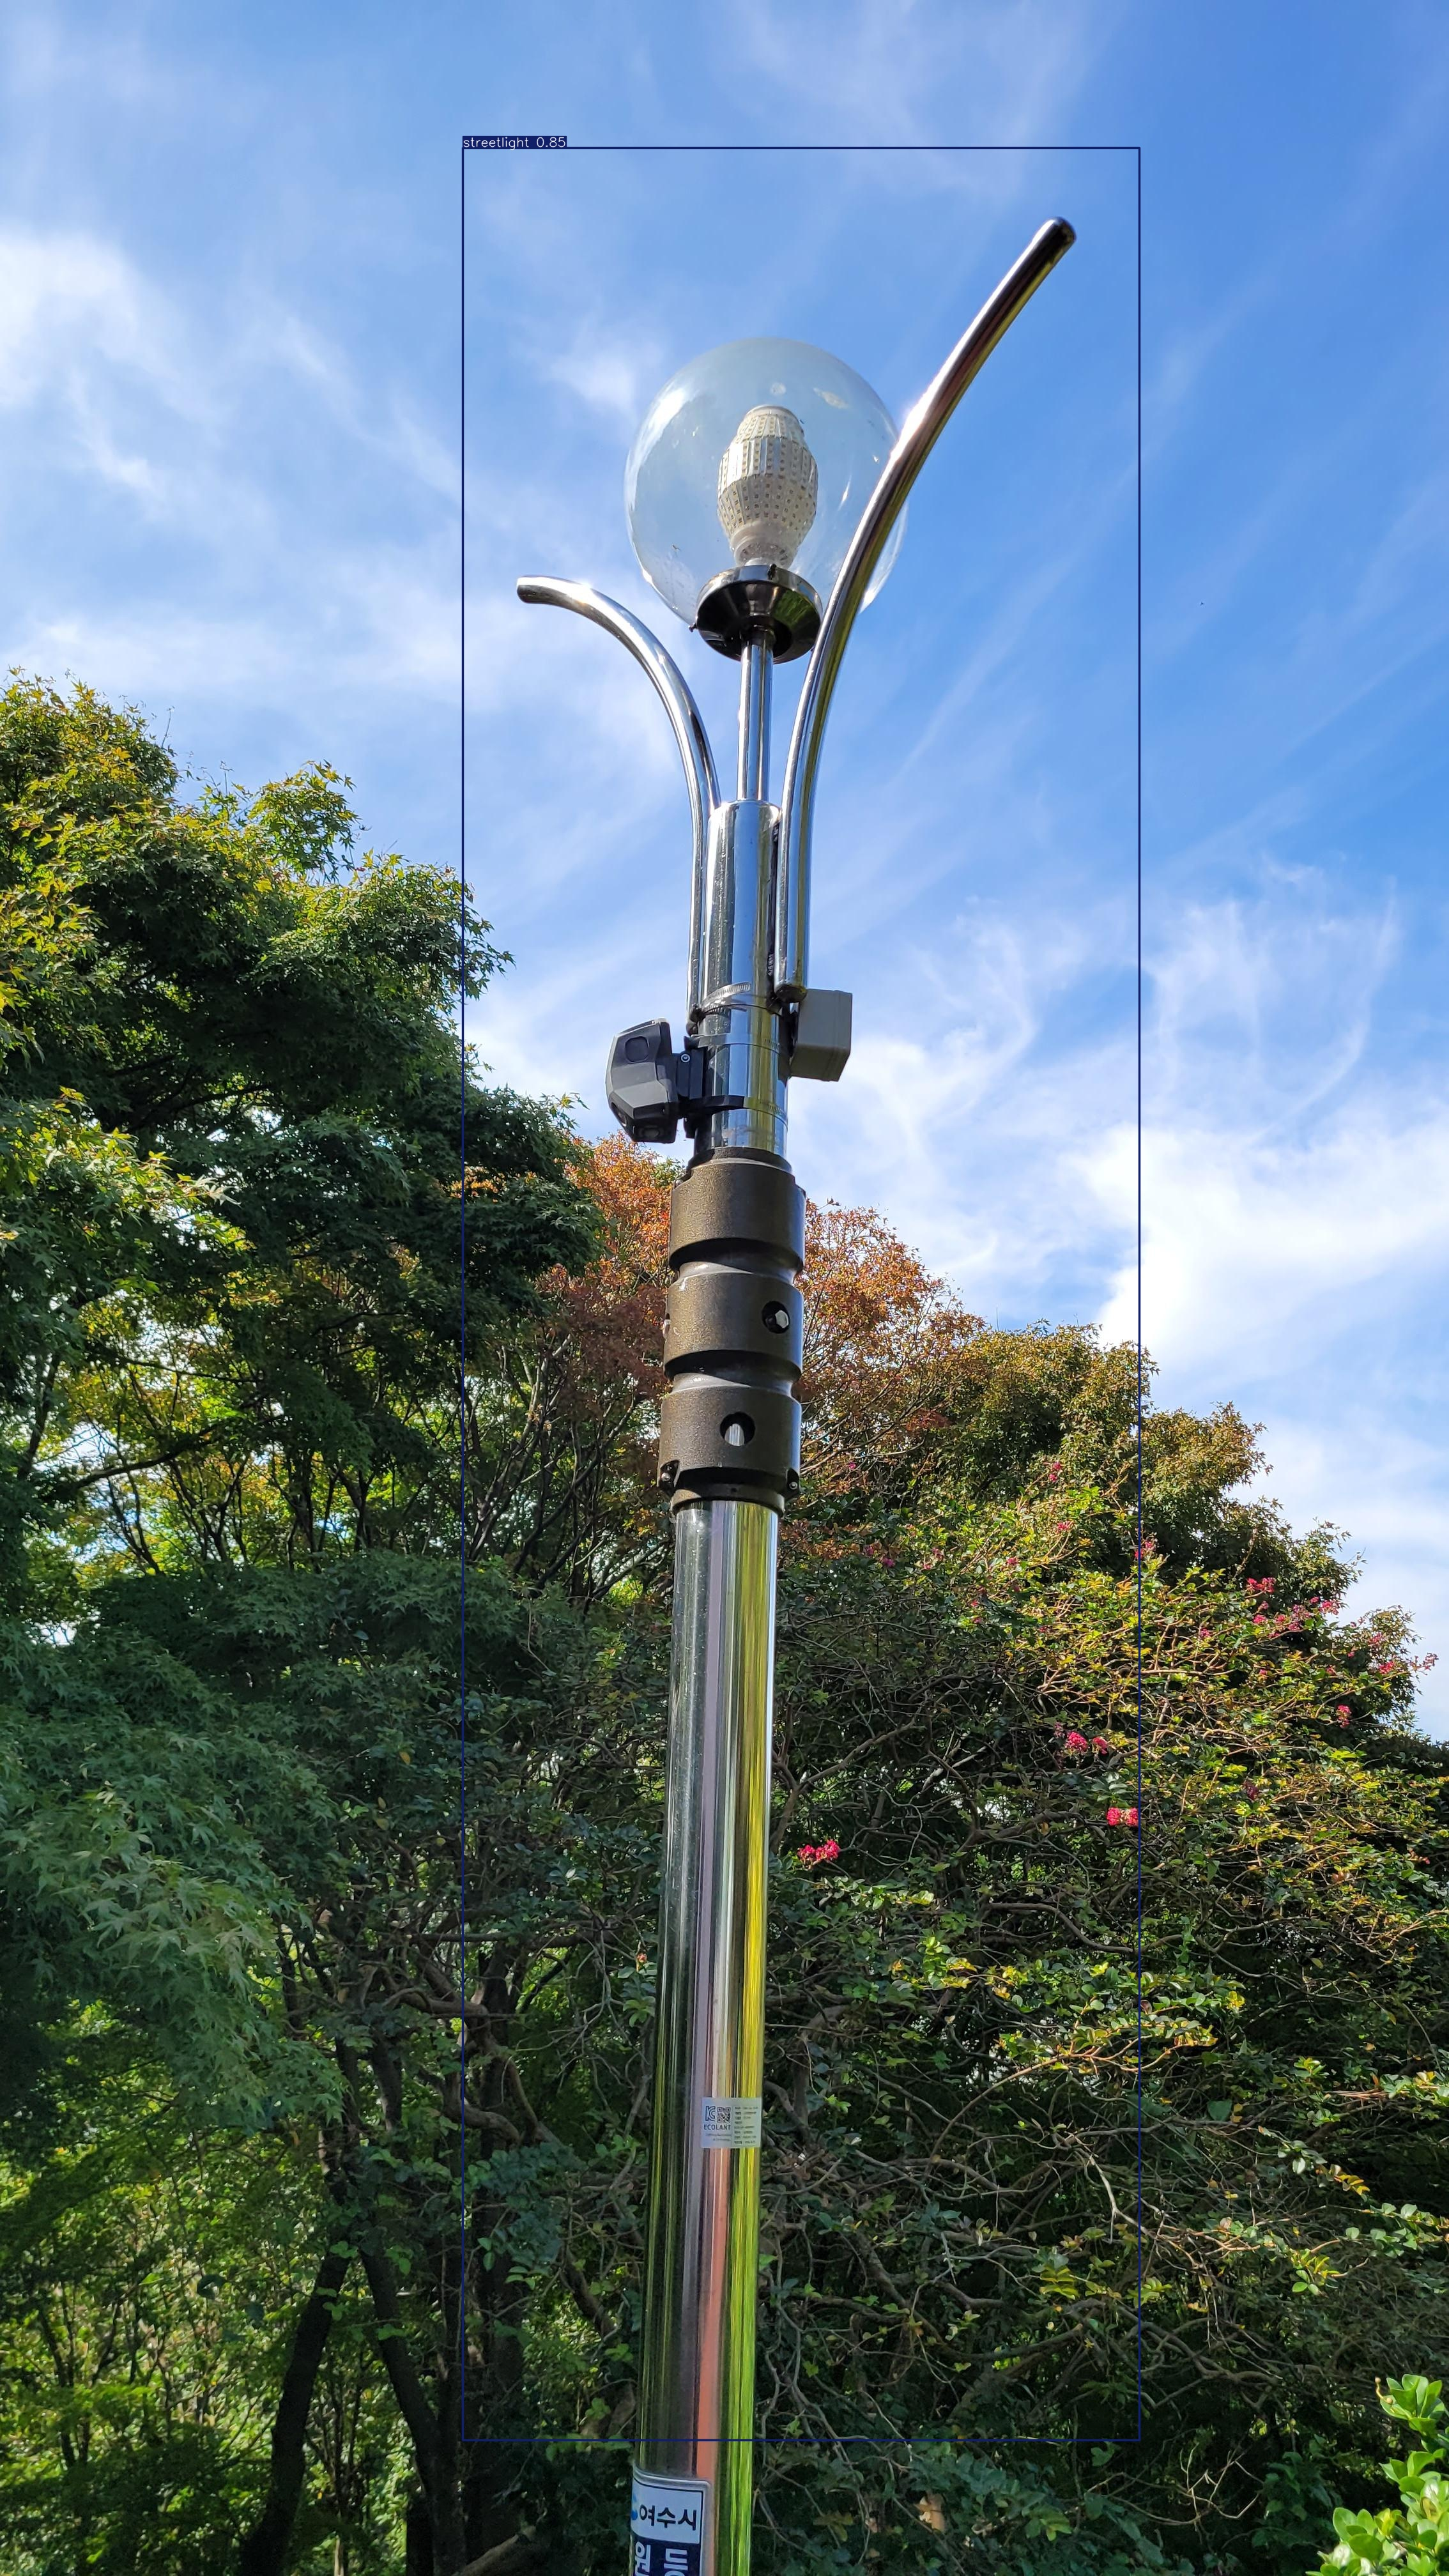

In [25]:
from ultralytics import YOLO
from IPython.display import Image
import os

# 학습된 모델 불러오기
model = YOLO("runs/detect/yolo_model6/weights/best.pt")

# 분석할 이미지
image_path = "street_light_test.jpeg"

# ✅ 같은 폴더에 계속 저장하도록 설정
results = model.predict(
    source=image_path,
    device=0,
    conf=0.25,
    save=True,
    show=True,
    project="runs/detect",   # 기본 저장 경로
    name="predict32",        # 폴더 이름 고정
    exist_ok=True,           # ✅ 기존 폴더 덮어쓰기 허용
    line_thickness=2,
    show_labels=True,
    show_conf=True
)

# 탐지된 객체 결과 출력
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    cls_name = model.names[cls_id]
    conf = float(box.conf[0])
    print(f"Detected: {cls_name} ({conf:.2f})")

# ONNX 내보내기
onnx_path = model.export(format="onnx")
print(f"✅ Model exported to: {onnx_path}")

# # 결과 이미지 표시
# Image(filename= f"runs/detect/predict32/{image_path[:-4]}.jpg")

base_name = os.path.splitext(os.path.basename(image_path))[0]
Image(filename=f"runs/detect/predict32/{base_name}.jpg")